In [1]:
from google.colab import files
uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

trader_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [7]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')
sentiment_df['date_only'] = sentiment_df['date'].dt.date

trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format="%m-%d-%Y %H:%M", errors='coerce')
trader_df['date_only'] = trader_df['Timestamp IST'].dt.date

merged_df = pd.merge(
    trader_df,
    sentiment_df[['date_only', 'classification']],
    on='date_only',
    how='left'
)

merged_df[['Account', 'Coin', 'Execution Price', 'Size USD', 'Side', 'Closed PnL', 'classification']].head()

,Account,Coin,Execution Price,Size USD,Side,Closed PnL,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,0.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,0.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,0.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,0.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,0.0,Greed


In [8]:
merged_df = merged_df.dropna(subset=['classification', 'Closed PnL'])
merged_df.shape

(35864, 18)

/tmp/ipython-input-9-972729347.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator='mean', ci='sd')


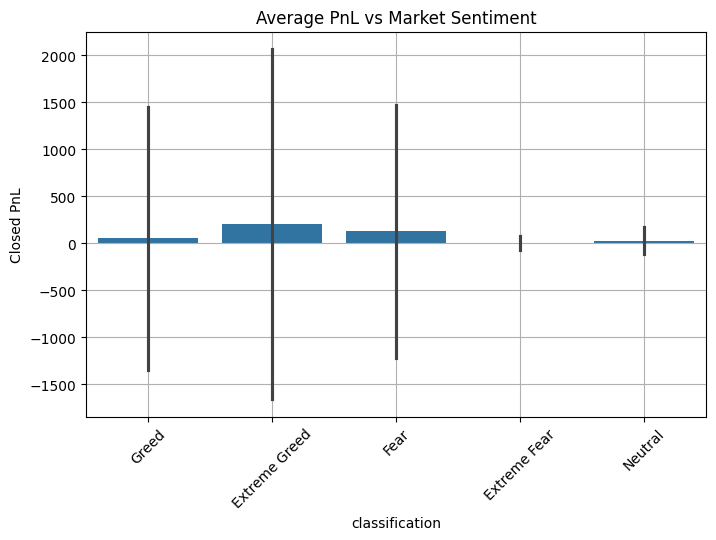

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator='mean', ci='sd')
plt.title('Average PnL vs Market Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

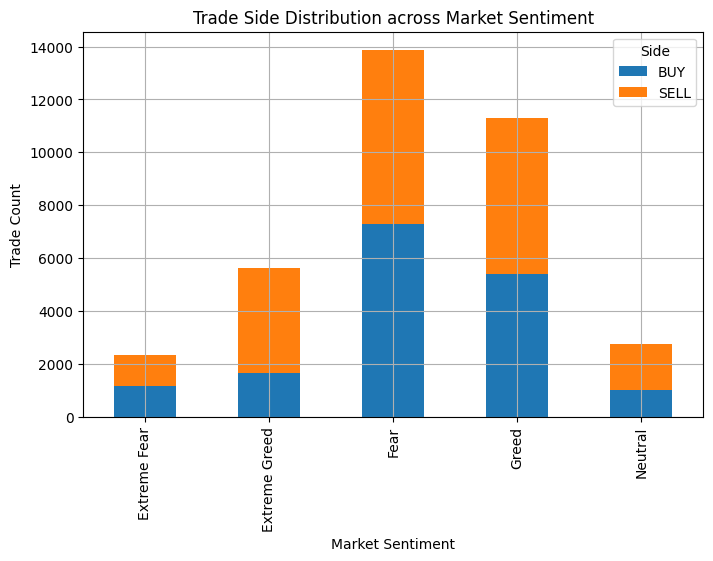

In [10]:
side_counts = merged_df.groupby(['classification', 'Side']).size().unstack()
side_counts.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Trade Side Distribution across Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Trade Count")
plt.grid(True)
plt.show()